In [1]:
%load_ext autoreload
%autoreload 2

import sys
import os
current_directory = os.getcwd()
sys.path.append(os.path.abspath(os.path.join(current_directory, os.pardir)))
import glob
                 
import numpy as np
from scipy import signal
import matplotlib.pyplot as plt
import matplotlib.patches as patches
from mayavi import mlab
from mpl_toolkits.mplot3d import Axes3D
from lrr_annot.loader import Loader
from lrr_annot.analyzer import Analyzer
from lrr_annot.plotter import plot_regression, plot_residue_annotations_3d

In [2]:
loader = Loader()
loader.load_batch("../data/a_thaliana_alpha")

Loading PDBs: 100%|███████████████████████████| 127/127 [00:07<00:00, 17.72it/s]


In [3]:
analyzer = Analyzer()
analyzer.load_structures(loader.structures)
analyzer.compute_windings()

Computing windings: 100%|█████████████████████| 127/127 [00:02<00:00, 58.34it/s]


In [4]:
analyzer.compute_regressions(n_breakpoints=2)
analyzer.compute_lrr_stds()

Computing stds: 100%|██████████████████████| 127/127 [00:00<00:00, 34638.87it/s]


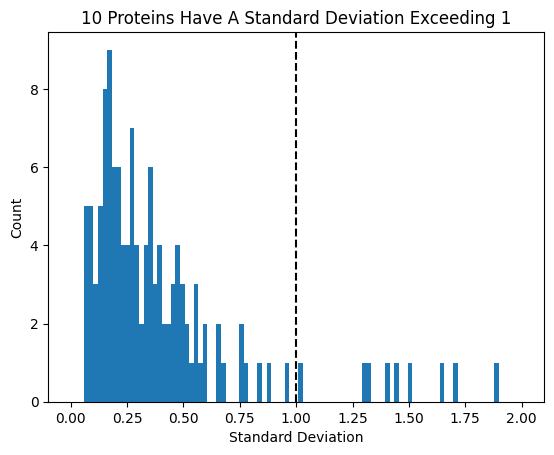

In [5]:
cutoff = 1
stds = np.array(list(analyzer.stds.values()))
plt.hist(stds, bins=np.linspace(0, 2, 100));
plt.axvline(cutoff, linestyle='--', c='k')
plt.xlabel("Standard Deviation")
plt.ylabel("Count")
plt.title("{} Proteins Have A Standard Deviation Exceeding {}".format(np.sum(stds > cutoff), cutoff))
plt.savefig("StandardDeviationHist.svg", bbox_inches='tight')